In [ ]:
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
zero_rows_all = df[(df == 0).all(axis=1)]

print(zero_rows_all)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
df = pd.read_csv('heart.csv')

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# View coefficients
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

# Create summary DataFrame
coef_summary = pd.DataFrame({
    'Feature': X.columns,
    'Log-Odds': coefficients,
    'Odds Ratio': odds_ratios
}).sort_values(by='Odds Ratio', ascending=True)

print(coef_summary)

     Feature  Log-Odds  Odds Ratio
1        sex -0.784446    0.456372
11        ca -0.773078    0.461590
9    oldpeak -0.715404    0.488994
8      exang -0.504713    0.603679
12      thal -0.493668    0.610384
3   trestbps -0.294942    0.744575
4       chol -0.194994    0.822839
0        age -0.111810    0.894214
5        fbs  0.014165    1.014266
6    restecg  0.219997    1.246073
10     slope  0.311299    1.365198
7    thalach  0.381285    1.464165
2         cp  0.848456    2.336037


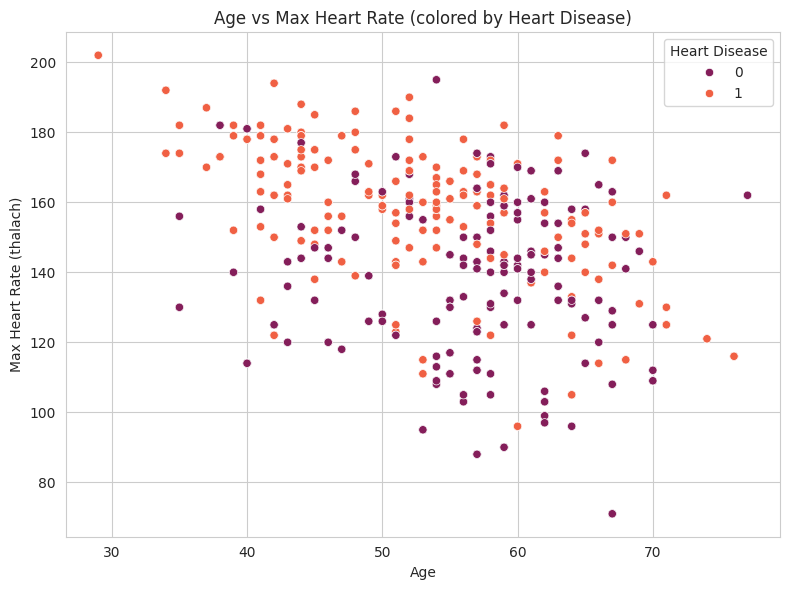

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette='rocket')

# Add labels and title
plt.title('Age vs Max Heart Rate (colored by Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.legend(title='Heart Disease')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/diabetes.csv')

# Show basic info
print(df.info())
print('\n')

# Show summary statistics
print(df.describe())
print('\n')
# Check for missing or zero values
print((df == 0).sum())  # useful for diabetes dataset where 0 may indicate missing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split before scaling (recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Add a constant to the features for intercept
X_const = sm.add_constant(X)

# Fit logistic regression using statsmodels
model_sm = sm.Logit(y, X_const)
result = model_sm.fit()

# Get log-odds (coefficients), odds ratios, and p-values
log_odds = result.params[1:]  # exclude the intercept
odds_ratios = np.exp(log_odds)
p_values = result.pvalues[1:]

# Create summary table
coef_summary = pd.DataFrame({
    'Feature': X.columns,
    'Log-Odds': log_odds,
    'Odds Ratio': odds_ratios,
    'P-Value': p_values
}).sort_values(by='Odds Ratio', ascending=False)

print(coef_summary)


Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                                           Feature  Log-Odds  Odds Ratio  \
DiabetesPedigreeFunction  DiabetesPedigreeFunction  0.945180    2.573276   
Pregnancies                            Pregnancies  0.123182    1.131091   
BMI                                            BMI  0.089701    1.093847   
Glucose                                    Glucose  0.035164    1.035789   
Age                                            Age  0.014869    1.014980   
SkinThickness                        SkinThickness  0.000619    1.000619   
Insulin                                    Insulin -0.001192    0.998809   
BloodPressure                        BloodPressure -0.013296    0.986792   

                               P-Value  
DiabetesPedigreeFunction  1.579980e-03  
Pregnancies               1.229642e-04  
BMI                       2.758957e-09  
Glucose                   2.509132e-21  
Age     

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7857142857142857
Confusion Matrix:
 [[90 14]
 [19 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       104
           1       0.69      0.62      0.65        50

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



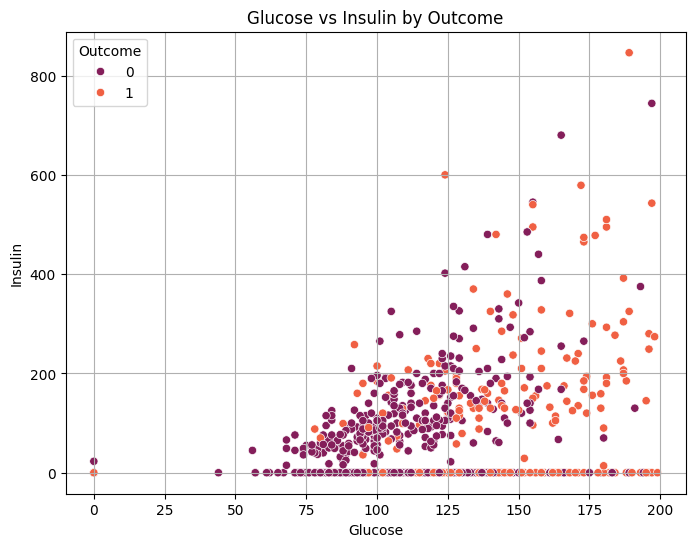

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (if not already loaded)
df = pd.read_csv('/content/diabetes.csv')

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Glucose', y='Insulin', hue='Outcome', palette='rocket')
plt.title('Glucose vs Insulin by Outcome')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend(title='Outcome')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load dataset
df = pd.read_csv('/content/diabetes.csv')

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Add a constant to the features for the intercept term
X_const = sm.add_constant(X)

# Fit logistic regression using statsmodels
model_sm = sm.Logit(y, X_const)
result = model_sm.fit()

# Get the coefficient (log-odds), odds ratio, and p-value for 'Glucose'
log_odds_glucose = result.params['Glucose']
odds_ratio_glucose = np.exp(log_odds_glucose)
p_value_glucose = result.pvalues['Glucose']

# Print results for 'Glucose'
print(f"Feature: Glucose")
print(f"Log-Odds: {log_odds_glucose:.4f}")
print(f"Odds Ratio: {odds_ratio_glucose:.4f}")
print(f"P-Value: {p_value_glucose:.4f}")


Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
Feature: Glucose
Log-Odds: 0.0352
Odds Ratio: 1.0358
P-Value: 0.0000


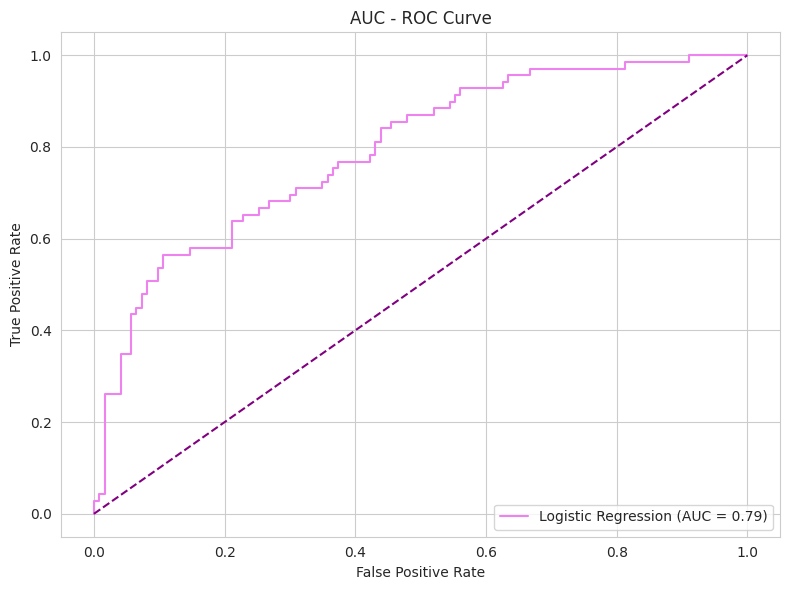

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/diabetes.csv')

# Split data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', color='violet')
plt.plot([0, 1], [0, 1], linestyle='--', color='purple')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC - ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define the predictors and target variable
X = df.drop('Outcome', axis=1)  # all columns except 'Outcome'
y = df['Outcome']  # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Coefficients of the full model
coefficients = pd.DataFrame(model.coef_, columns=X.columns)
coefficients


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.064373,0.034095,-0.013879,0.003291,-0.001803,0.102607,0.626718,0.037095


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Fit a logistic regression with L1 regularization (Lasso) for variable selection
lasso_model = LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=10000)
lasso_model.fit(X_train, y_train)

# Get the coefficients after L1 regularization
lasso_coefficients = pd.DataFrame(lasso_model.coef_, columns=X.columns)
lasso_coefficients


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.064286,0.033406,-0.014161,0.003104,-0.001741,0.099336,0.639526,0.03608


In [ ]:
# Count the number of non-zero coefficients
selected_variables = [col for col in X.columns if lasso_model.coef_[0, X.columns.get_loc(col)] != 0]
num_selected = len(selected_variables)
num_selected


8

In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy before variable selection (Full Model)
y_pred_full = model.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Accuracy after variable selection (Lasso Model)
X_train_selected = X_train[selected_variables]
X_test_selected = X_test[selected_variables]
lasso_y_pred = lasso_model.predict(X_test_selected)
accuracy_lasso = accuracy_score(y_test, lasso_y_pred)

accuracy_full, accuracy_lasso


(0.7467532467532467, 0.7532467532467533)